<h1 style="font-size: 1.6rem; font-weight: bold">ITO 5047: Fundamentals of Artificial Intelligence</h1>
<h1 style="font-size: 1.6rem; font-weight: bold">Module 3 - Bayesian Networks</h1>
<p style="margin-top: 5px; margin-bottom: 5px;">Monash University Australia</p>
<p style="margin-top: 5px; margin-bottom: 5px;">Jupyter Notebook by: Tristan Sim Yook Min</p>

---

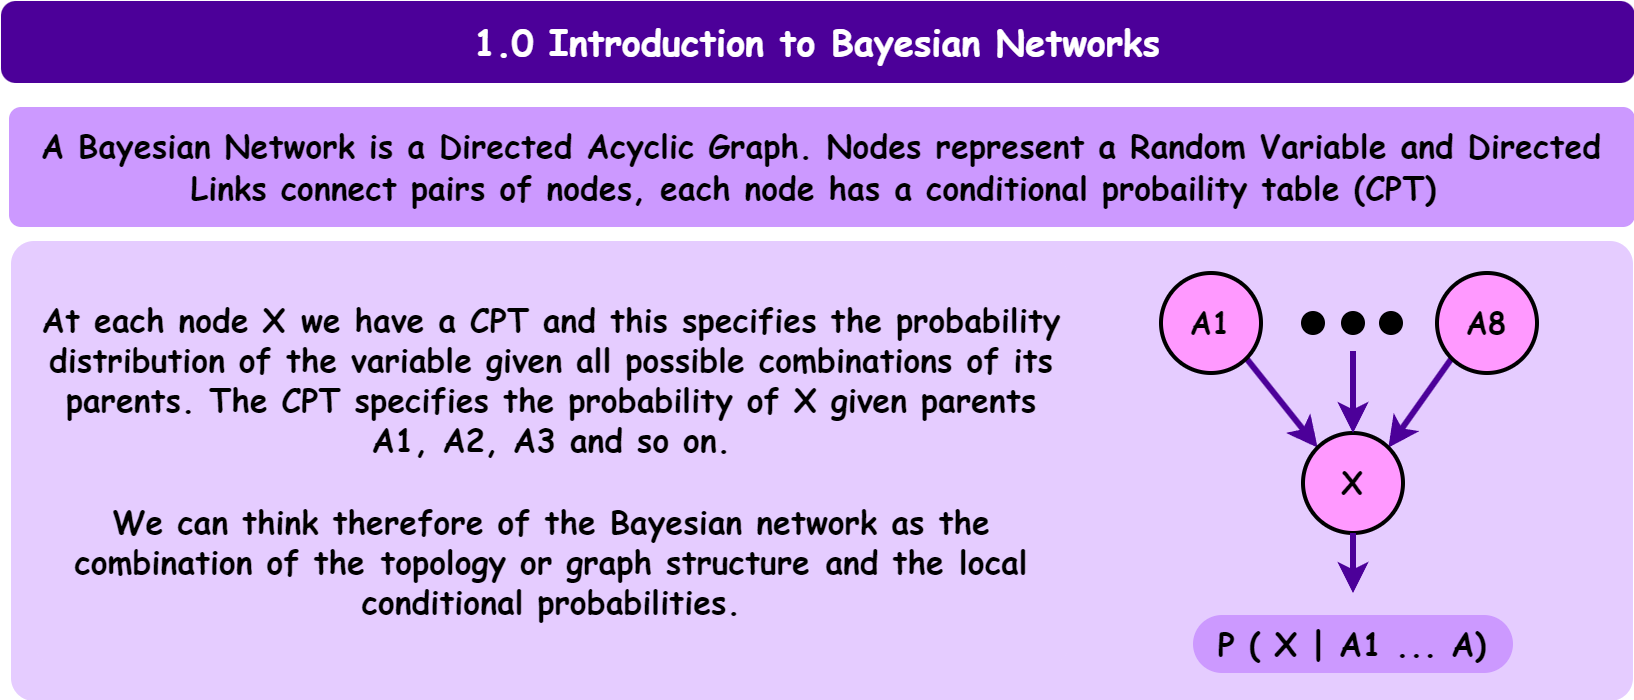

<br>

### **Probabilities in Bayesian Networks**

Bayesian Network Implicitly encodes the entire joint distribution of all variables in the network. The Full assignment of the joint distribution can be found using the chain rule and the conditionals imposed on the network.

$$Pr(x_1, x_2, ..., x_n) = \prod_{i=1}^{n} Pr(x_i|parents(x_i))$$

<br>

### **Building a Joint Distribution Example**

The Diagram below can be expressed as a Joint Distribution as shown:

$$Pr(x_1, x_2, ..., x_n) = \prod_{i=1}^{n} Pr(x_i|parents(x_i))$$
$$Pr(cavity, catch, toothache) = Pr(toothache|cavity) \times Pr(catch|cavity) \times Pr(cavity)$$

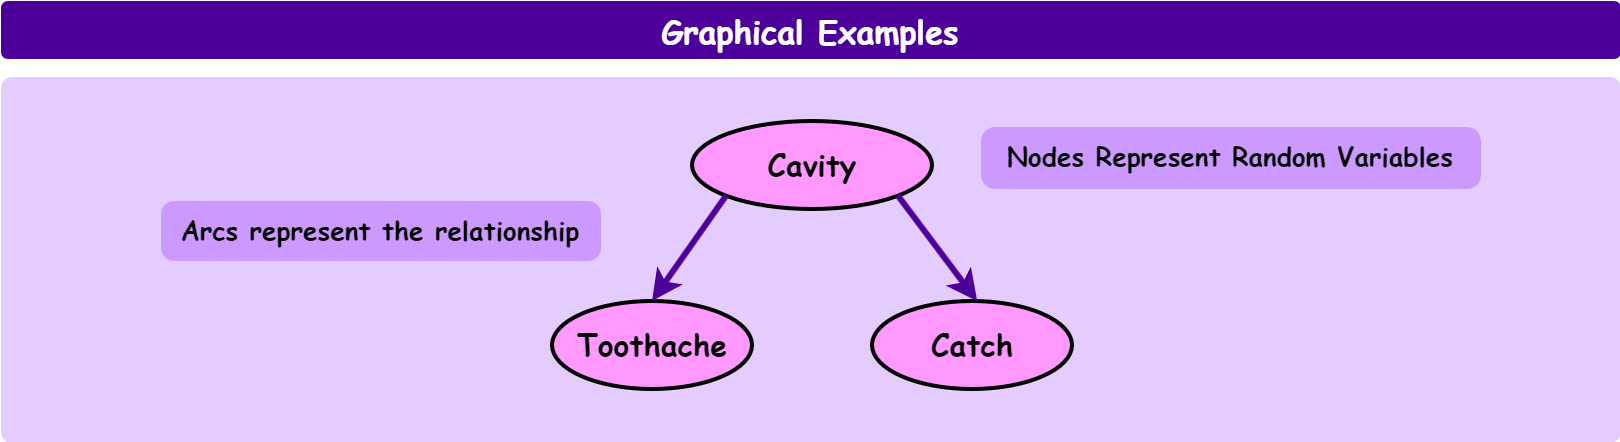


### **Size of a Bayes Net**

Storing all combinations for n boolean variables requires 2^n values (exponential growth).

A Bayesian network with n nodes and at most k parents per node only needs O(n × 2^k) values (much smaller).

**Key benefit**: Massive space savings while staying simple to understand.


---

### **Constructing A Bayesian Network Example**

### **Lung cancer diagnosis**
A patient has been suffering from shortness of breath (called dyspnoea) and visits the doctor, worried that they have lung cancer. The doctor knows that other relevant information includes whether or not the patient is a smoker (increasing the chances of cancer) and what sort of air pollution they have been exposed to. A positive X-ray would indicate lung cancer.


#### **Nodes and Values**
Nodes can be categorized into discrete or continuous. They can have binary, boolean, ordered or even in as numerical values. 

| Node name | Type | Values |
|-----------|------|--------|
| Pollution | Ordered | {low, high} |
| Smoker | Boolean | {T, F} |
| Cancer | Boolean | {T, F} |
| Dyspnoea | Boolean | {T, F} |
| Xray | Binary | {pos, neg} |
| Age | Integral | [1, 120] |


#### **Network Structure**
Based on the Doctor's statement, we are able to create a network structures with nodes and arcs represent the relationships of the cancer causing items and the symptoms.

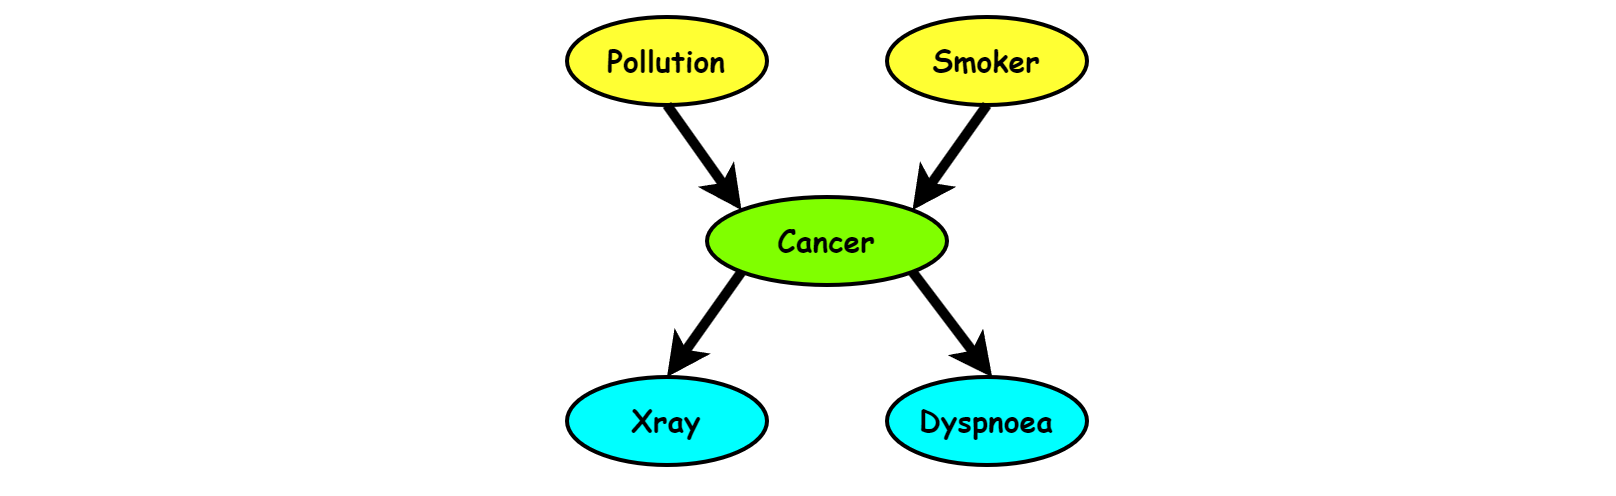

<br>

#### **Conditional Probability Table (CPT)**
A Conditional Probability Table for a Table can be constructed. 

| Pollution | Smoker | P(Cancer=T\|P,S) | P(Cancer=F\|P,S) |
|-----------|--------|------------------|------------------|
| High      | T      | 0.05             | 0.95             |
| High      | F      | 0.02             | 0.98             |
| Low       | T      | 0.03             | 0.97             |
| Low       | F      | 0.001            | 0.999            |

#### **Construct the Entire network CPTs**

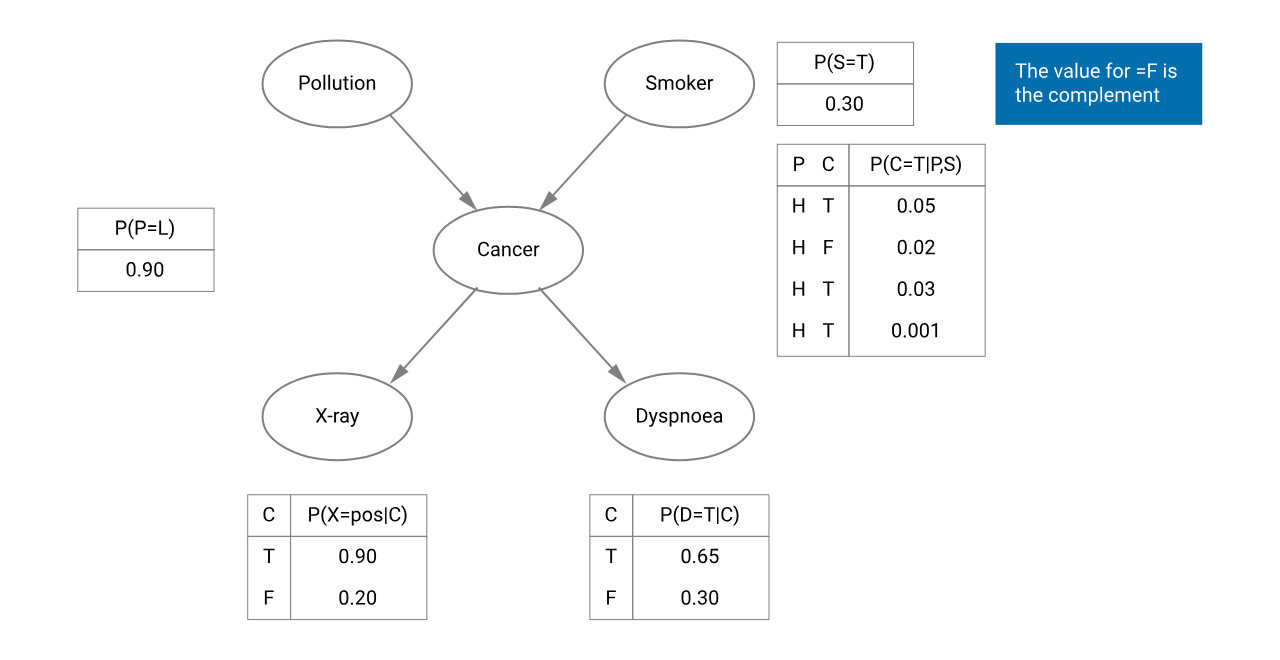

---

### **D-Seperations**

**Causality?**

Bayesian network arcs don't necessarily represent causality - they primarily encode **conditional independence relationships**.

**Key points:**
- Arcs may happen to reflect causal structure, but it's not required
- Good practice to align with causal patterns when possible (simpler, easier for experts)
- The network structure mainly shows statistical dependencies, not cause-and-effect

**Example issue:** The described network has problematic cycles:
- Sprinkler → Wet grass → Rain → Sprinkler

This creates a circular dependency that doesn't match real causality (rain and sprinklers both cause wet grass, but wet grass doesn't cause rain).

**Conditional independence and Bayesian network structure**

Conditional independence determines how evidence propagates through the network.

To analyze any Bayesian network structure, we use three canonical cases:

1. **Causal chains** 
2. **Common causes** 
3. **Common effects**

These patterns show whether two variables are conditionally independent and how information flows between them.

<br>

#### **Causal chains**
The first case looks like a causal chain of events. Consider the following network. If we know 'Rain', then is 'Traffic' independent of 'Low pressure'? The answer is yes.
Network structure:

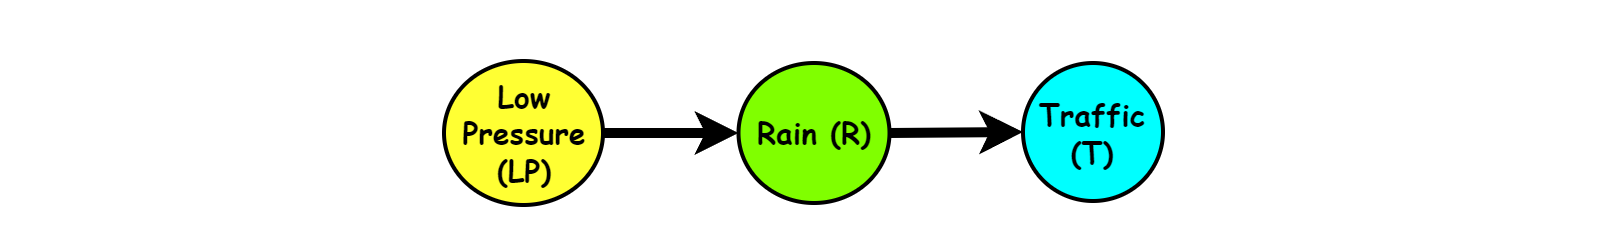

**Mathematical proof:**
$$Pr(T|LP,R) = \frac{Pr(T,LP,R)}{Pr(LP,R)} = \frac{Pr(LP)Pr(R|LP)Pr(T|R)}{Pr(LP)Pr(R|LP)} = Pr(T|R)$$

<br>

#### **Common Cause**
The second case is called **common cause** and it looks like an upside down V. 
In the following network, if we don't know the value of 'cancer' then are 'x-ray' and 'dyspnoea' independent? **No.** If we do know 'cancer' then are 'x-ray' and 'dyspnoea' independent? **Yes.** When we know the common cause (Cancer), its effects (Xray and Dyspnoea) become conditionally independent. Cancer "explains away" the correlation between its effects.

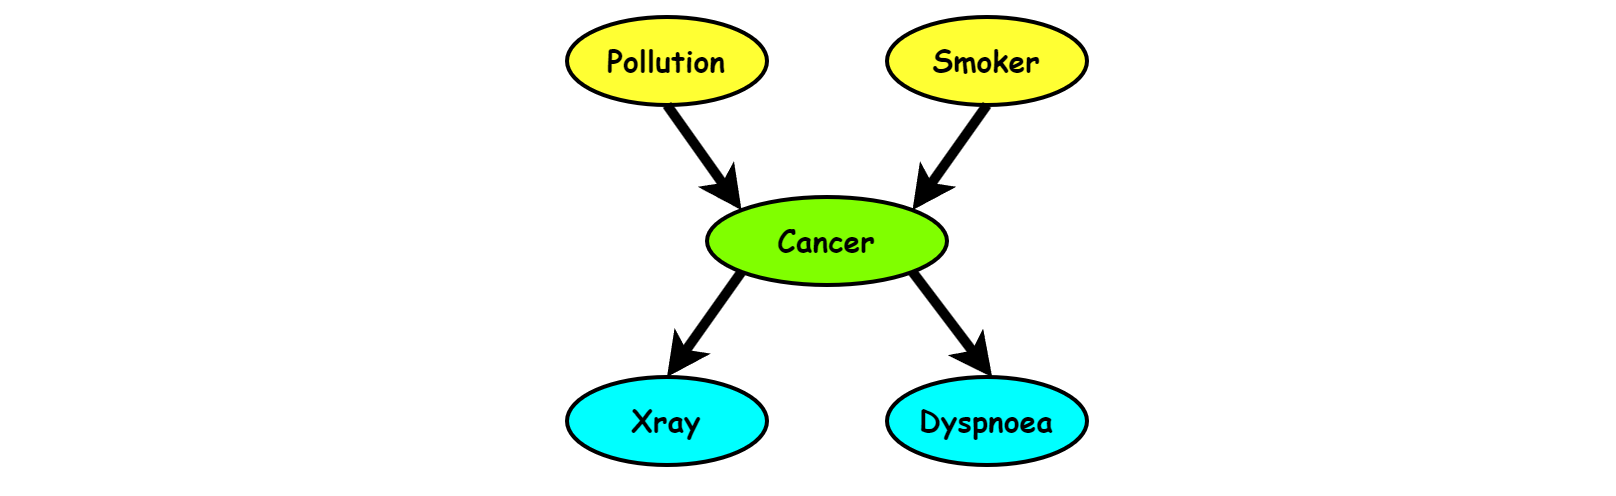

**Mathematical proof:**
$$Pr(D|C,X) = \frac{Pr(C,X,D)}{Pr(C,X)} = \frac{Pr(C)Pr(X|C)Pr(D|C)}{Pr(C)Pr(X|C)} = Pr(D|C)$$

<br>

#### **Common Effect**
The third case is called **common effect** and behaves opposite to the other two cases.

- **Without evidence** about 'cancer': 'pollution' and 'smoker' are independent
- **With evidence** about 'cancer': 'pollution' and 'smoker' become dependent

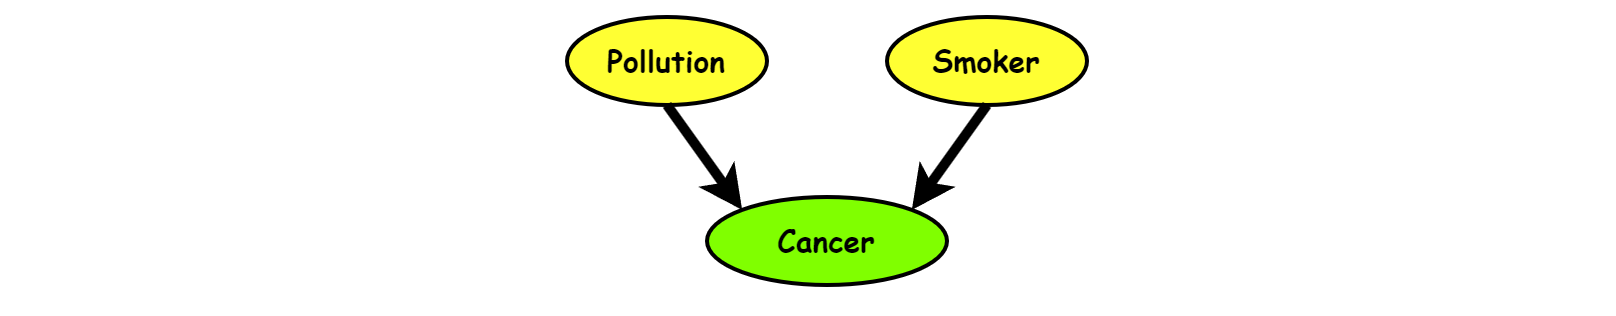

<br>

### **Direction-dependent separation**

We use **D-separation** to determine conditional independence by combining the three canonical cases. Two sets of nodes are D-separated by evidence when every undirected path between them is blocked.

**Path (Undirected path):** Any sequence of nodes connecting two sets where:
- Adjacent nodes are connected by arcs (direction doesn't matter)
- No node appears twice in the sequence

**D-separation rule:** Sets of nodes A and B are conditionally independent if D-separated by evidence E. This means every undirected path from any node in A to any node in B is blocked by the evidence in E.

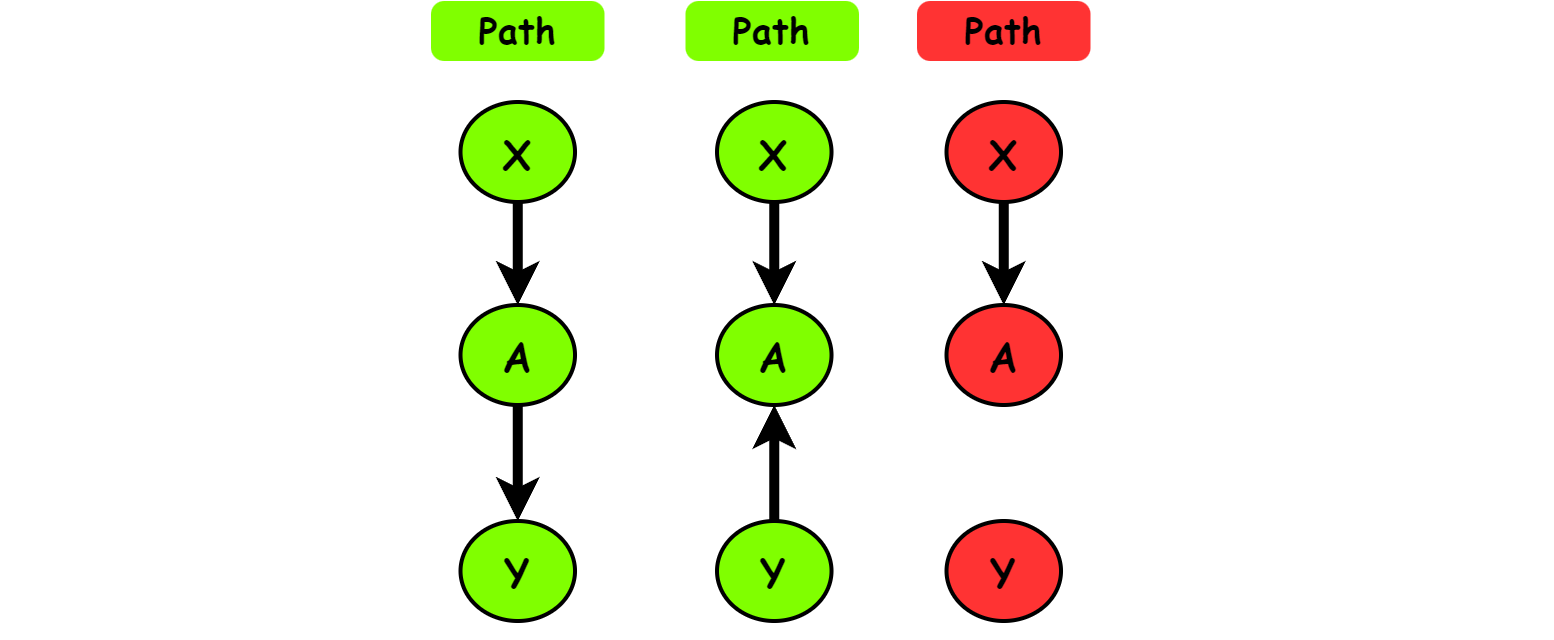

### **D-Separation – blocked path**

To determine conditional independence, check that all paths are blocked. A path is blocked if any of these conditions hold:

1. **Causal chain**: Node is in evidence E and has one arrow in and one arrow out
2. **Common cause**: Node is in evidence E and has both arrows leading out  
3. **Common effect**: Node is NOT in evidence E (and neither are its descendants) and has both arrows leading in

**Key principle:** Evidence either blocks information flow (chains/causes) or creates it (effects).

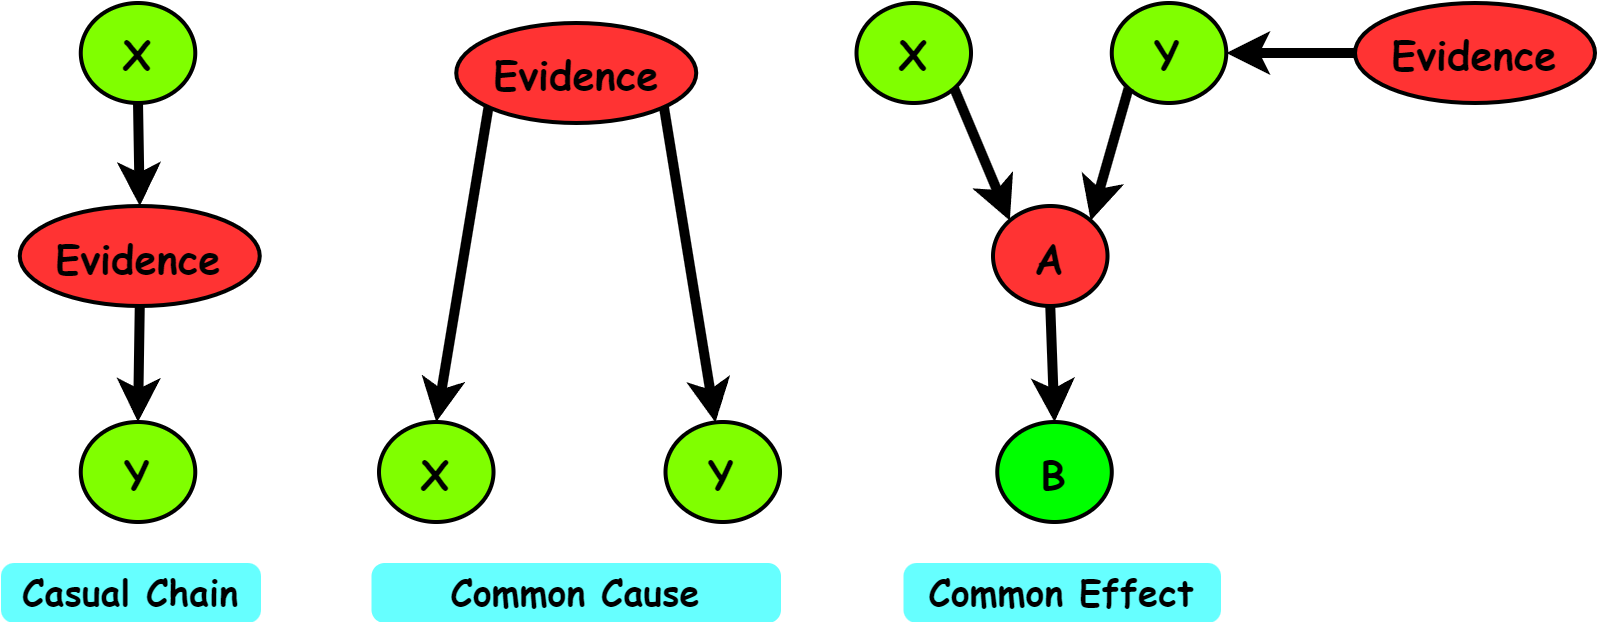